## Observations and Insights 

In [2]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pdf = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [4]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [5]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [6]:
# Checking the number of mice in the DataFrame.
mice_num = len(pd.unique(pdf["Mouse ID"]))
print(f"The number of mice in this dataset is {mice_num}")

The number of mice in this dataset is 249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Filtering out values that have the same mouse id and conflicting timepoints
filt = pdf.groupby("Mouse ID").filter(lambda g: (g["Timepoint"].nunique()>1))
filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1881 non-null   object 
 1   Drug Regimen        1881 non-null   object 
 2   Sex                 1881 non-null   object 
 3   Age_months          1881 non-null   int64  
 4   Weight (g)          1881 non-null   int64  
 5   Timepoint           1881 non-null   int64  
 6   Tumor Volume (mm3)  1881 non-null   float64
 7   Metastatic Sites    1881 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.3+ KB


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(pd.unique(filt["Mouse ID"]))
clean_num_mice

237

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_group = filt.groupby("Drug Regimen")
reg_mean = reg_group["Tumor Volume (mm3)"].mean()
reg_med = reg_group["Tumor Volume (mm3)"].median()
reg_var = reg_group["Tumor Volume (mm3)"].var()
reg_std = reg_group["Tumor Volume (mm3)"].std()
reg_sem = reg_group["Tumor Volume (mm3)"].sem()
# This method is the most straightforward, creating multiple series and putting them all together at the end.
reg_summary = pd.DataFrame({"Mean": reg_mean,
                           "Median": reg_med,
                           "Variance": reg_var,
                           "Standard Deviation": reg_std,
                           "SEM": reg_sem})
reg_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.765682,51.910178,38.835601,6.231822,0.472433
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.345698,53.739593,68.149888,8.255295,0.605308
Naftisol,54.432995,52.544915,65.934669,8.120017,0.598616
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.284444,52.488221,59.303779,7.700895,0.573991


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
filt.groupby("Drug Regimen").describe()
# This method produces everything in a single groupby function.

Age_months                                                     \
                  count       mean       std  min   25%   50%    75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.0  16.5  20.00  24.0   
Ceftamin          174.0  13.258621  8.082437  2.0   6.0  12.0  20.00  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.0  20.0  23.00  24.0   
Ketapril          186.0  15.741935  5.954609  2.0  12.0  18.0  19.00  24.0   
Naftisol          184.0  12.016304  6.716325  2.0   8.0   9.0  19.25  23.0   
Placebo           180.0  10.688889  6.342452  1.0   5.0  10.0  17.00  21.0   
Propriva          160.0  10.937500  7.307003  1.0   5.0   8.0  21.00  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.0   9.0  18.00  23.0   
Stelasyn          180.0  12.777778  7.961188  1.0   4.0  14.0  21.00  23.0   
Zoniferol         181.0  12.640884  5.774300  2.0   8.0  13.0  16.00  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          174.0  27.396552  ...          57.080919  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          186.0  27.860215  ...          60.899768  78.567014   
Naftisol          184.0  27.146739  ...          60.023500  76.668817   
Placebo           180.0  27.916667  ...          59.962344  73.212939   
Propriva          160.0  27.031250  ...          56.259803  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          180.0  27.861111  ...          58.792405  75.123690   
Zoniferol         181.0  27.679558  ...          57.997706  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                174.0  1.206897  1.184075  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                186.0  1.311828  1.394805  0.0  0.0  1.0  2.0  4.0  
Naftisol                184.0  1.195652  1.216814  0.0  0.0  1.0  2.0  4.0  
Placebo                 180.0  1.450000  1.338201  0.0  0.0  1.0  2.0  4.0  
Propriva                160.0  0.981250  1.084319  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                180.0  0.877778  0.972560  0.0  0.0  1.0  1.0  4.0  
Zoniferol               181.0  1.237569  1.248965  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar Plots

<IPython.core.display.Javascript object>


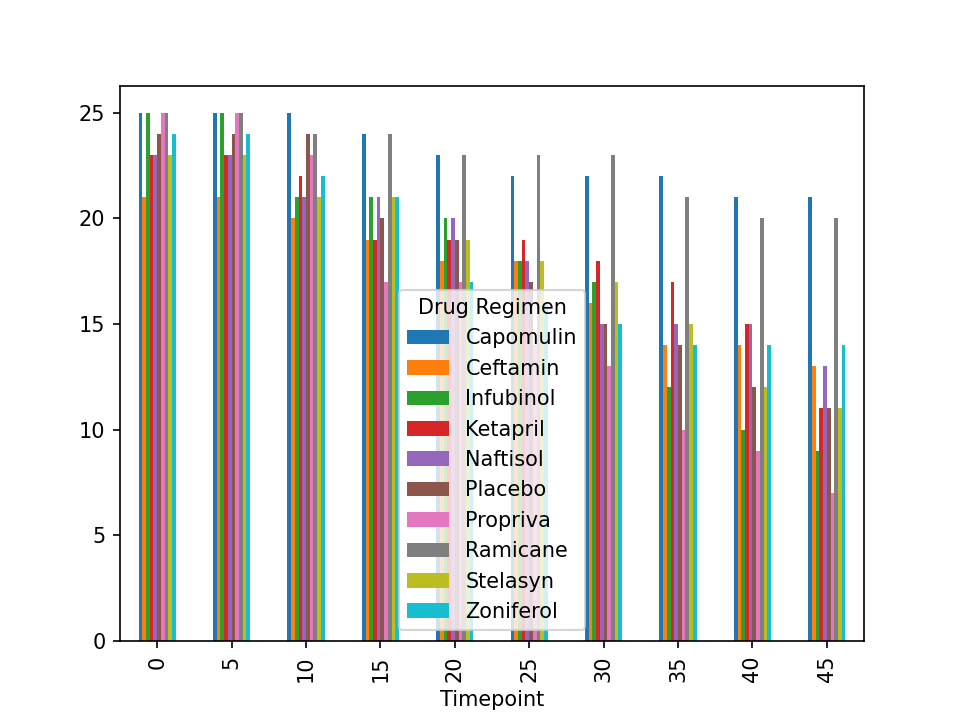

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
barfilt = filt.groupby("Timepoint")["Drug Regimen"].value_counts()
bardf = barfilt.unstack()
bardf.plot.bar()


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,21,25,23,23,24,25,25,23,24
5,25,21,25,23,23,24,25,25,23,24
10,25,20,21,22,21,24,23,24,21,22
15,24,19,21,19,21,20,17,24,21,21
20,23,18,20,19,20,19,17,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


<IPython.core.display.Javascript object>


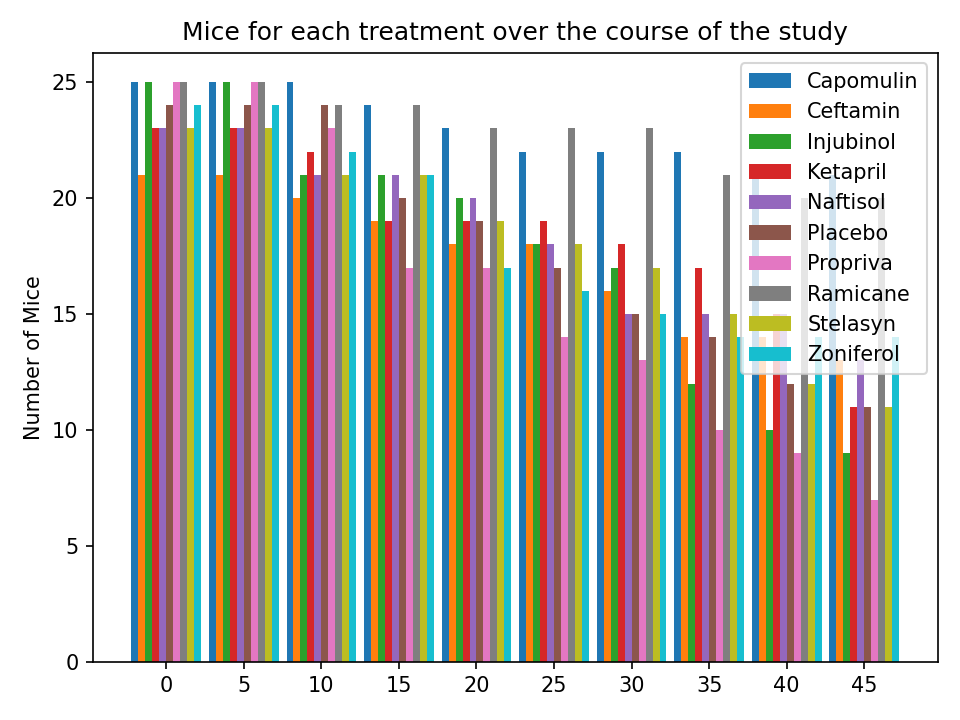

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
labels=pd.unique(filt["Timepoint"])
x = np.arange(len(labels))
width = 0.09

fig, ax = plt.subplots()
rect1 = ax.bar(x-width*4.5, bardf["Capomulin"], width, label="Capomulin")
rec2 = ax.bar(x-width*3.5, bardf["Ceftamin"], width, label="Ceftamin")
rec3 = ax.bar(x-width*2.5, bardf["Infubinol"], width, label="Injubinol")
rec4 = ax.bar(x-width*1.5, bardf["Ketapril"], width, label="Ketapril")
rec5 = ax.bar(x-width/2, bardf["Naftisol"], width, label="Naftisol")
rec6 = ax.bar(x+width/2, bardf["Placebo"], width, label="Placebo")
rec7 = ax.bar(x+width*1.5, bardf["Propriva"], width, label="Propriva")
rec8 = ax.bar(x+width*2.5, bardf["Ramicane"], width, label="Ramicane")
rec9 = ax.bar(x+width*3.5, bardf["Stelasyn"], width, label="Stelasyn")
rec10 = ax.bar(x+width*4.5, bardf["Zoniferol"], width, label="Zoniferol")

ax.set_ylabel("Number of Mice")
ax.set_title("Mice for each treatment over the course of the study")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## Pie Plots

<IPython.core.display.Javascript object>


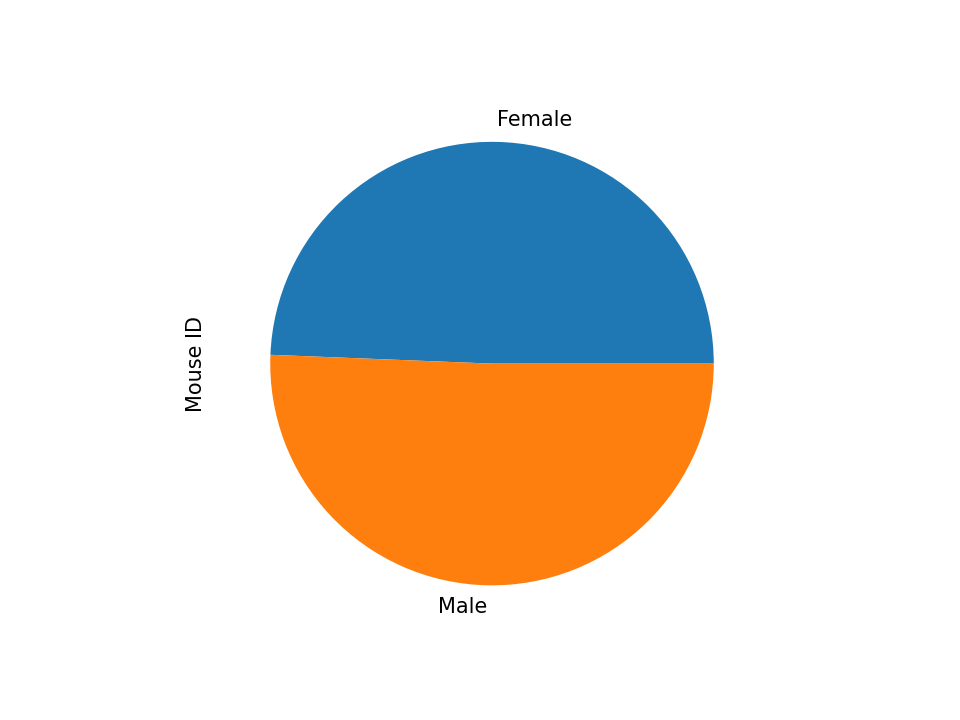

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pies = filt.groupby("Sex")["Mouse ID"].nunique()
pies.plot(kind="pie")

<IPython.core.display.Javascript object>


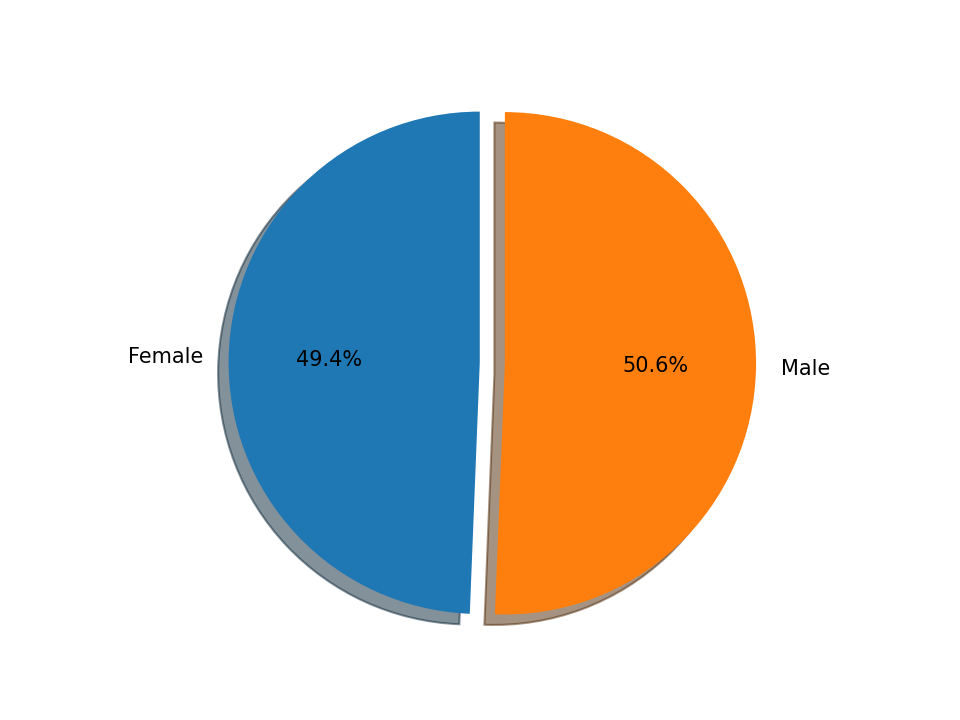

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = ["Female", "Male"]
figp, axp = plt.subplots()
axp.pie(pies,explode=[.1, 0],  labels=pie_labels, autopct="%1.1f%%", shadow=True, startangle=90)
axp.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
promise_gr = filt.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last()
promise_gr.head(50)


Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
              i557        47.685963
              i738        37.311846
              j119        38.125164
              j246        38.753265
              l509        41.483008
              l897        38.846876
              m601        28.430964
              m957        33.329098
              r157        46.539206
              r554        32.377357
              r944        41.581521
              s185        23.343598
              s710        40.728578
              t565        34.455298
              u364        31.023923
              v923        40.658124
              w150        39.952347
              w914        36.041047
              x401        28.484033
              y793        31.896238
Ceftamin      a275        62.999356
              b487        56.057749
     

<IPython.core.display.Javascript object>


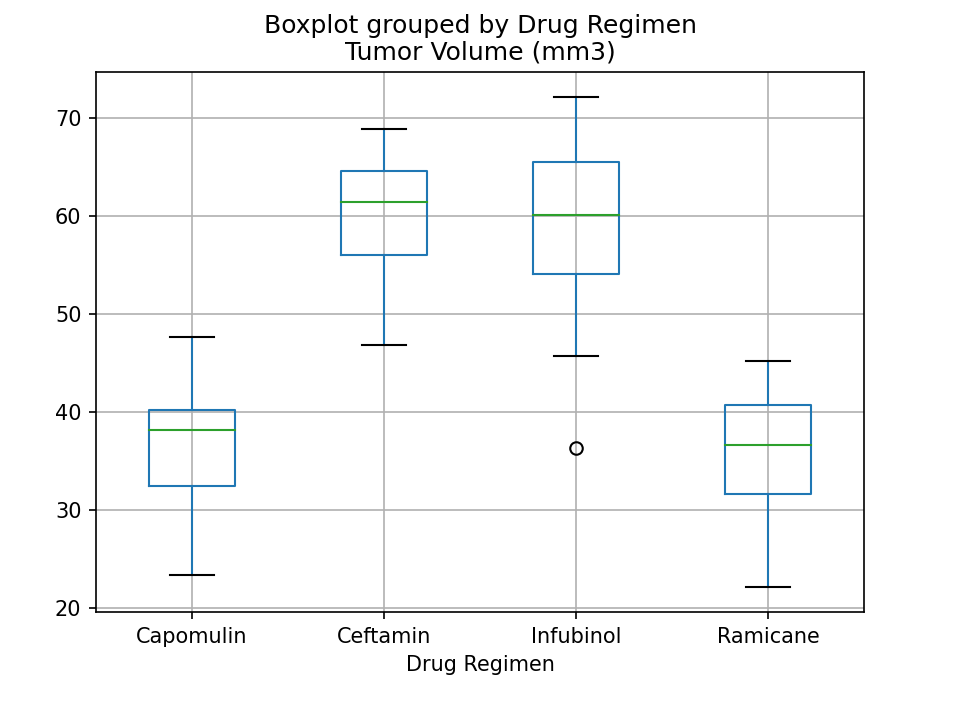

In [52]:
pr_stack = promise_gr.unstack()
pr_stack["IQR"] = st.iqr(pr_stack, axis=1, nan_policy="omit")
pr_drop = pr_stack.dropna(axis=1)
box_df = pd.merge(filt.groupby(["Drug Regimen", "Mouse ID"], as_index=False)["Tumor Volume (mm3)"].last(),
                  pr_drop, on="Drug Regimen")
box_df = box_df.loc[(box_df["Drug Regimen"] == "Capomulin") | (box_df["Drug Regimen"] == "Ramicane")\
                    | (box_df["Drug Regimen"] == "Infubinol") | (box_df["Drug Regimen"] == "Ceftamin")]
box_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen")

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

<IPython.core.display.Javascript object>


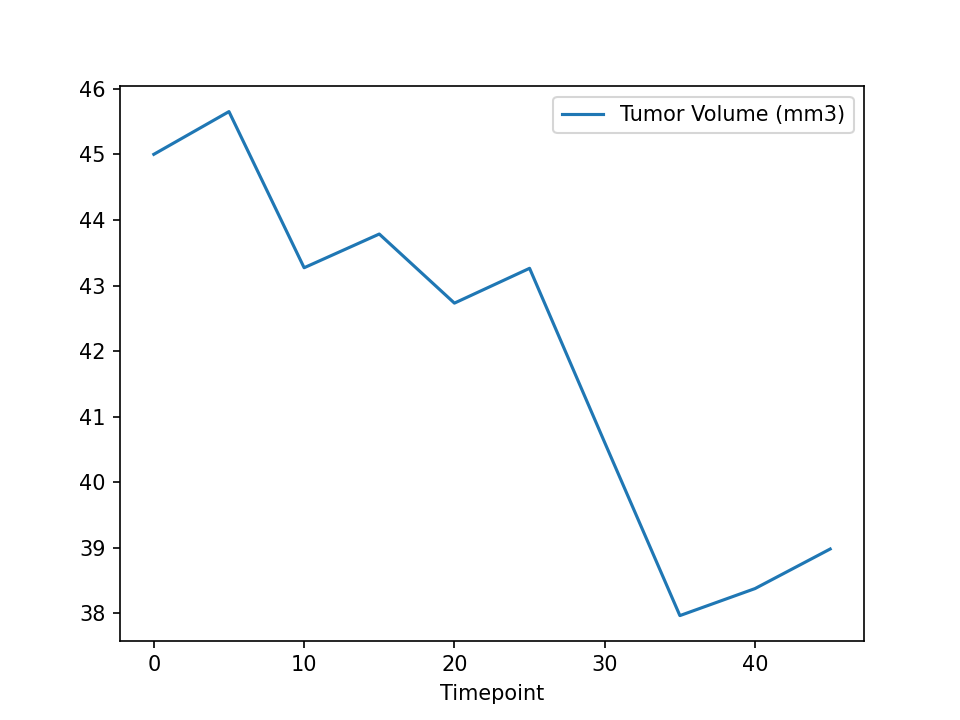

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = filt.loc[(filt["Drug Regimen"]=="Capomulin")]
line_df.loc[(line_df["Mouse ID"]=="b128")].plot.line(x="Timepoint", y="Tumor Volume (mm3)")

In [56]:
line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


<IPython.core.display.Javascript object>


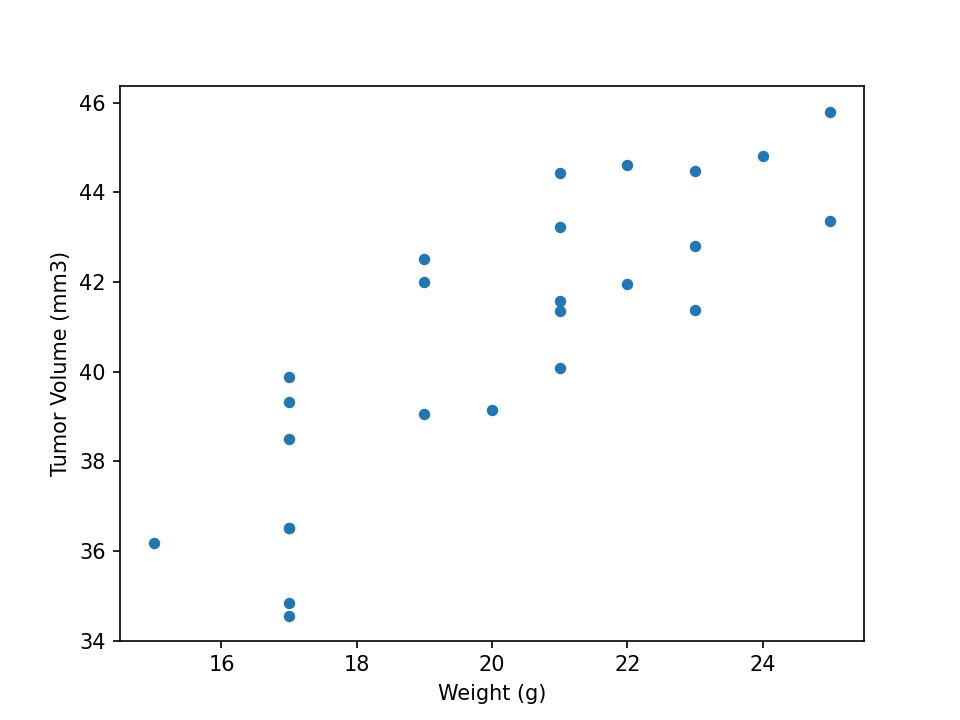

In [73]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tum_avg = line_df.groupby("Mouse ID", as_index=False)["Tumor Volume (mm3)"].mean()
weights = line_df.groupby("Mouse ID", as_index=False)["Weight (g)"].first()
scatter_df = pd.merge(tum_avg, weights, on="Mouse ID")
scatter_df.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter")

## Correlation and Regression

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.mstats.pearsonr(scatter_df["Weight (g)"], scatter_df["Tumor Volume (mm3)"])

(0.8419363424694718,
 masked_array(data=1.32257224e-07,
              mask=False,
        fill_value=1e+20))

In [78]:
st.linregress(scatter_df["Weight (g)"], scatter_df["Tumor Volume (mm3)"])

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)